# Tugas

## Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.


### Langkah 1 - Load Library

In [15]:
import tensorflow as tf
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

### Langkah 2 - Unduh Dataset CIFAR

In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 4s 0us/step


In [5]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )

datagen.fit(train_images)

### Langkah 3 - Verifikasi Data

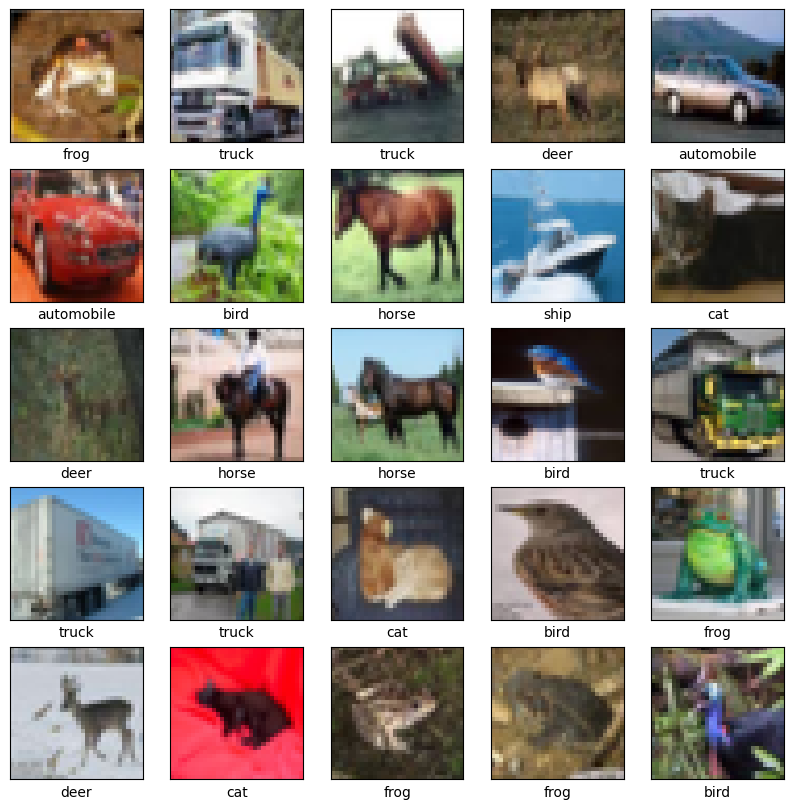

In [6]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
              'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Langkah 4 - Buat Model CNN

#### Langkah 4.1. - Buat Layer Konvolusi

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), input_shape=(32, 32, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(layers.Conv2D(64, (3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(layers.Conv2D(64, (3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(layers.Conv2D(128, (3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(layers.Conv2D(256, (3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D((2, 2)))

#### Langkah 4.2. - Cek Arsitektur Konvolusi

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 64)        0

#### Langkah 4.3. - Tambahkan Layer Fully Connected

In [9]:
model.add(layers.Flatten())

model.add(layers.Dense(256))
model.add(layers.BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10))

#### Langkah 4.4. - Cek Arsitektur Model CNN

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 64)        0

#### Langkah 4.5. - Compile Model CNN

In [16]:
initial_learning_rate = 0.001

def lr_schedule(epoch):
    return initial_learning_rate * 0.95 ** epoch

model.compile(optimizer=Adam(learning_rate=initial_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


#### Langkah 5 - Fit Model

In [17]:
history = model.fit(train_images, train_labels, batch_size=32,
                    epochs=10, validation_data=(test_images, test_labels),
                    callbacks=[LearningRateScheduler(lr_schedule)])

Epoch 1/10
1563/1563 [==============================] - 41s 16ms/step - loss: 1.2092 - accuracy: 0.5779 - val_loss: 1.0965 - val_accuracy: 0.6083 - lr: 0.0010
Epoch 2/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7571 - accuracy: 0.7368 - val_loss: 0.7445 - val_accuracy: 0.7462 - lr: 9.5000e-04
Epoch 3/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.6133 - accuracy: 0.7896 - val_loss: 0.7059 - val_accuracy: 0.7631 - lr: 9.0250e-04
Epoch 4/10
1563/1563 [==============================] - 26s 16ms/step - loss: 0.5031 - accuracy: 0.8272 - val_loss: 0.6642 - val_accuracy: 0.7747 - lr: 8.5737e-04
Epoch 5/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.4091 - accuracy: 0.8584 - val_loss: 0.7010 - val_accuracy: 0.7781 - lr: 8.1451e-04
Epoch 6/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.3326 - accuracy: 0.8846 - val_loss: 0.5485 - val_accuracy: 0.8222 - lr: 7.7378e-04
Epoch 7/10
1563/1563 [====

#### Langkah 6 - Evaluasi Model

313/313 - 2s - loss: 0.5357 - accuracy: 0.8531 - 2s/epoch - 5ms/step


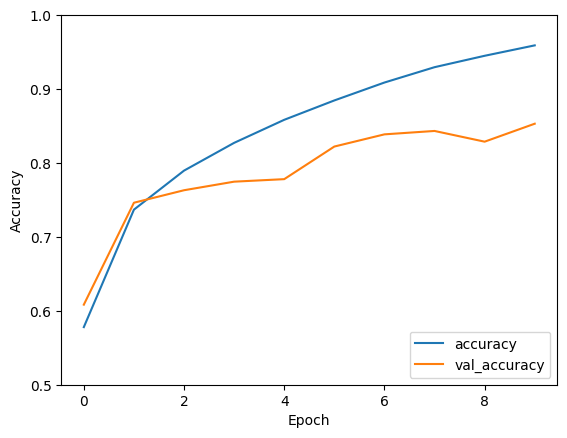

In [18]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

Dari hasil grafik tersebut, dapat terlihat skor accuracy dan val_accuracy sempat beriringan, dan kemudian mulai terpisah setelah epoch kesatu. Berdasarkan hasil val_accuracy tersebut dapat diambil kesimpulan bahwa model cukup fitting untuk memprediksi data tersebut.

#### Langkah 7 - Cetak Hasil Akurasi

In [19]:
print(test_acc)

0.8531000018119812


## Buatlah model CNN untuk klasifikasi dataset MNIST.

Dengan menggunakan tahapan dan model yang sama, dilakukan proses berikut:

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 16s 7ms/step - loss: 0.1302 - accuracy: 0.9625 - val_loss: 0.0383 - val_accuracy: 0.9877 - lr: 0.0010
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0647 - accuracy: 0.9801 - val_loss: 0.0364 - val_accuracy: 0.9881 - lr: 9.5000e-04
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0509 - accuracy: 0.9840 - val_loss: 0.0263 - val_accuracy: 0.9913 - lr: 9.0250e-04
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0389 - accuracy: 0.9877 - val_loss: 0.0256 - val_accuracy: 0.9927 - lr: 8.5737e-04
Epoch 5/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0340 - accuracy: 0.9893 - val_loss: 0.0233 - val_accuracy: 0.9931 - lr: 8.1451e-04
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0271 - accuracy: 0.9913 - val_loss: 0.0237 - val_a

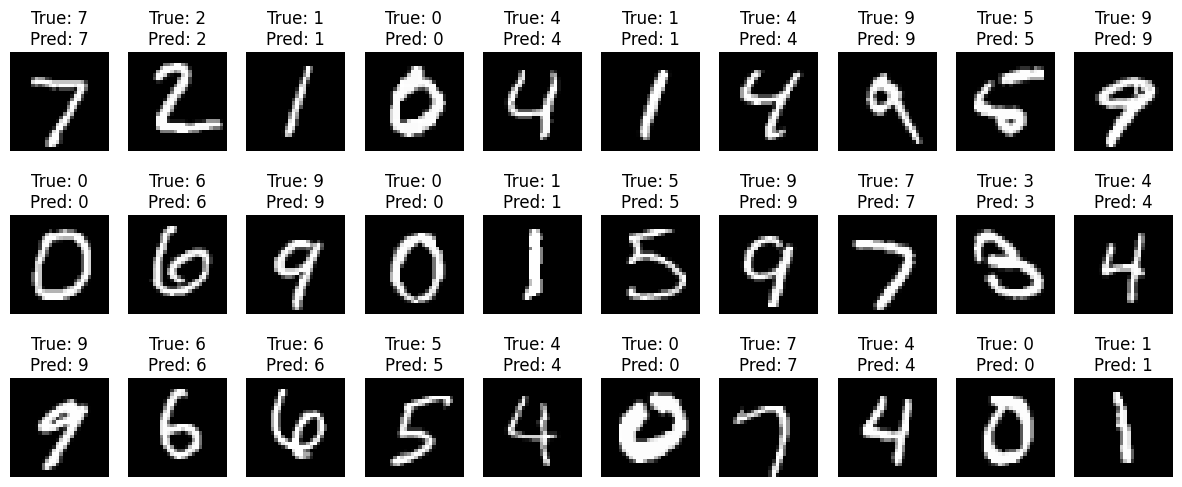

In [20]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels_categorical = to_categorical(train_labels)
test_labels_categorical = to_categorical(test_labels)

# Model architecture
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), input_shape=(28, 28, 1), padding='same'))
model.add(layers.BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(128))
model.add(layers.BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10, activation='softmax'))

# Compile the model
initial_learning_rate = 0.001

def lr_schedule(epoch):
    return initial_learning_rate * 0.95 ** epoch

model.compile(optimizer=Adam(learning_rate=initial_learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels_categorical, batch_size=32,
                    epochs=10, validation_data=(test_images, test_labels_categorical),
                    callbacks=[LearningRateScheduler(lr_schedule)])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels_categorical, verbose=2)
print(f'Test accuracy: {test_acc}')

# Visualize predictions
predictions = model.predict(test_images)
num_images = 30

plt.figure(figsize=(15, 6))
for i in range(num_images):
    plt.subplot(3, 10, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    true_label = np.argmax(test_labels_categorical[i])
    predicted_label = np.argmax(predictions[i])

    if true_label != predicted_label:
        color = 'red'
    else:
        color = 'black'

    plt.title(f'True: {true_label}\nPred: {predicted_label}', color=color)
    plt.axis('off')

plt.show()

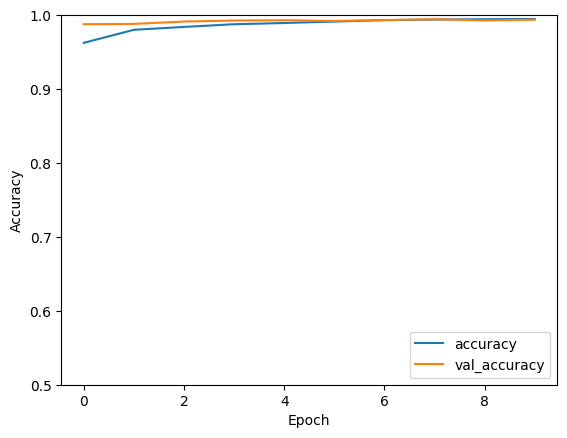

In [21]:
## Hasil grafik
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()